### STEP 1- Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir("C://Users//KOMAL//Desktop//data//ML Classification Package//5. K Nearest Neighbours")

In [4]:
tshirt=pd.read_csv("Tshirt_Sizing_Dataset.csv")
tshirt

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [5]:
tshirt.head(5)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [6]:
tshirt.tail(5)

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


In [7]:
tshirt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Height (in cms)  18 non-null     int64 
 1   Weight (in kgs)  18 non-null     int64 
 2   T Shirt Size     18 non-null     object
dtypes: int64(2), object(1)
memory usage: 424.0+ bytes


In [8]:
tshirt.isna().sum()

Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64

In [9]:
tshirt.duplicated().sum()

0

### STEP 2- Creating Testing and training dataset

In [10]:
X_df=tshirt.iloc[:,0:2]
X_df

,Height (in cms),Weight (in kgs)
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [11]:
y_df=tshirt.iloc[:,2]
y_df

0     S
1     S
2     S
3     S
4     S
5     S
6     S
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: T Shirt Size, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_df=labelencoder.fit_transform(y_df)
y_df

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_df,y_df, test_size=0.25, random_state=5)

In [14]:
X_train.shape

(13, 2)

#### STEP 3 - Model Training

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

###  STEP 4 - Model testing

In [16]:
y_predicted=knn.predict(X_test)

In [17]:
y_predicted

array([1, 1, 0, 1, 0])

In [18]:
y_test

array([1, 1, 0, 1, 0])

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

In [20]:
cm

array([[2, 0],
       [0, 3]], dtype=int64)

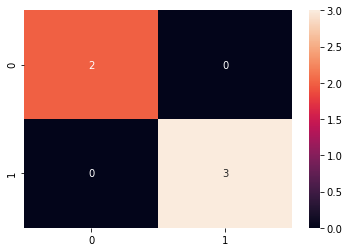

In [21]:
sns.heatmap(cm, annot=True)

### Step 5- Test Results Visualization

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key